In [1]:
import importlib
import numpy as np
import CR_ML_Class as CR
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
print("Tensorflow Version is {}".format(tf.__version__))
print("Keras Version is {}".format(tf.keras.__version__))


gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
except RuntimeError as e:
# Visible devices must be set before GPUs have been initialized
    print(e)

Tensorflow Version is 2.0.0
Keras Version is 2.2.4-tf
1 Physical GPUs, 1 Logical GPU


In [2]:
importlib.reload(CR)
para_0_0 = np.load("./Numpy_mock_data/parameter_0.npy")
para_0_1 = np.load("./Numpy_mock_data/new_parameter_0.npy")
origin_data_0 = np.load("./Numpy_mock_data/data_0.npy")
mock_0 = CR.Mock_Data_PreProcessing(para_0_0, para_0_1, origin_data_0)
print("There are {} data ".format(len(mock_0.new_parameter)))
chi_0 = np.load("./Numpy_mock_data/new_chi_0.npy")

para_1_0 = np.load("./Numpy_mock_data/parameter_1.npy")
para_1_1 = np.load("./Numpy_mock_data/new_parameter_1.npy")
origin_data_1 = np.load("./Numpy_mock_data/data_1.npy")
mock_1 = CR.Mock_Data_PreProcessing(para_1_0, para_1_1, origin_data_1)
chi_1 = np.load("./Numpy_mock_data/new_chi_1.npy")

parameter_2_0 =  np.load("./Numpy_mock_data/parameter_2.npy")
parameter_2_1 = np.load("./Numpy_mock_data/new_parameter_2.npy")
origin_data_2 = np.load("./Numpy_mock_data/data_2.npy")
mock_2 = CR.Mock_Data_PreProcessing(parameter_2_0, parameter_2_1, origin_data_2)
chi_2 = np.load("./Numpy_mock_data/new_chi_2.npy")


parameter_3_0 =  np.load("./Numpy_mock_data/parameter_3.npy")
parameter_3_1 = np.load("./Numpy_mock_data/new_parameter_3.npy")
origin_data_3 = np.load("./Numpy_mock_data/data_3.npy")
mock_3 = CR.Mock_Data_PreProcessing(parameter_3_0, parameter_3_1, origin_data_3)
chi_3 = np.load("./Numpy_mock_data/new_chi_3.npy")

parameter_4_0 =  np.load("./Numpy_mock_data/parameter_4.npy")
parameter_4_1 = np.load("./Numpy_mock_data/new_parameter_4.npy")
origin_data_4 = np.load("./Numpy_mock_data/data_4.npy")
mock_4 = CR.Mock_Data_PreProcessing(parameter_4_0, parameter_4_1, origin_data_4)
chi_4 = np.load("./Numpy_mock_data/new_chi_4.npy")

parameter = np.concatenate((mock_0.new_parameter,mock_1.new_parameter))
data = np.concatenate((mock_0.data,mock_1.data))
chi = np.concatenate((chi_0,chi_1))

parameter = np.concatenate((parameter,mock_2.new_parameter))
data = np.concatenate((data,mock_2.data))
chi = np.concatenate((chi,chi_2))

parameter = np.concatenate((parameter,mock_3.new_parameter))
data = np.concatenate((data,mock_3.data))
chi = np.concatenate((chi,chi_3))

parameter = np.concatenate((parameter,mock_4.new_parameter))
data = np.concatenate((data,mock_4.data))
chi = np.concatenate((chi,chi_4))


# parameter = mock_4.new_parameter[:15000]
# data = mock_4.data[:15000]
# chi =chi_4[:15000]

chi_sort = np.argsort(chi)

print("minium chi:", min(chi))
print("There are {} data ".format(parameter.shape[0]))

There are 223365 data 
minium chi: 347.33360999999996
There are 374445 data 


In [3]:
importlib.reload(CR)
chi_para, chi_data, chi_sele = parameter,data,chi #mock_0.new_parameter[:], mock_0.data[:], chi_0[:]

para_1_sigma, data_1_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,1).Sample()
para_2_sigma, data_2_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,2).Sample()
para_3_sigma, data_3_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,3).Sample()
para_4_sigma, data_4_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,4).Sample()
para_5_sigma, data_5_sigma, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,5).Sample()
para_6_sigma, data_6_sigma, chi_6_sigma =  CR.Select_Sample(chi_para, chi_data, chi_sele,6).Sample()

There are 2226 data in the 1 \sigma region.
Time consumption : 0.0032 min
There are 6600 data in the 2 \sigma region.
Time consumption : 0.0039 min
There are 13970 data in the 3 \sigma region.
Time consumption : 0.0050 min
There are 24700 data in the 4 \sigma region.
Time consumption : 0.0081 min
There are 39055 data in the 5 \sigma region.
Time consumption : 0.0112 min
There are 57252 data in the 6 \sigma region.
Time consumption : 0.0128 min


In [4]:
importlib.reload(CR)
chi_para, chi_data, chi_sele = mock_4.new_parameter[:15000],mock_4.data[:15000], chi_4[:15000]

para_1_sigma_, data_1_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,1).Sample()
para_2_sigma_, data_2_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,2).Sample()
para_3_sigma_, data_3_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,3).Sample()
para_4_sigma_, data_4_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,4).Sample()
para_5_sigma_, data_5_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,5).Sample()
para_6_sigma_, data_5_sigma_, _ =  CR.Select_Sample(chi_para, chi_data, chi_sele,6).Sample()

There are 204 data in the 1 \sigma region.
Time consumption : 0.0002 min
There are 569 data in the 2 \sigma region.
Time consumption : 0.0002 min
There are 1275 data in the 3 \sigma region.
Time consumption : 0.0003 min
There are 2581 data in the 4 \sigma region.
Time consumption : 0.0005 min
There are 4381 data in the 5 \sigma region.
Time consumption : 0.0008 min
There are 6425 data in the 6 \sigma region.
Time consumption : 0.0011 min


In [7]:
importlib.reload(CR)

pseudoparameter_4 = np.load("./Pseudodata/normalfactor_15000_wo_noise_0729.npy")
pseudodata_4 = np.load("./Pseudodata/pseudo_15000_wo_noise_0729.npy")

# pseudoparameter_4 = np.load("./Pseudodata/normalfactor_15000_w_noise_0729.npy")
# pseudodata_4 = np.load("./Pseudodata/pseudo_15000_w_noise_0729.npy")

pure_pseudoparameter = np.load("./Pseudodata/pseudo_para_6sigma.npy")
pure_pseudodata = np.load("./Pseudodata/pseudo_data_6sigma.npy")
chi_pseudo = CR.Calculate_Chi_Square(data=pure_pseudodata, usedata = True).chi_square()
chi_index_pseudo = np.argsort(chi_pseudo)

# chi = CCS.Calculate_Chi_Square(parameter,data)
# parameter = parameter_0[:15000]
# pseudodata = modify_data_0[:15000]
# # chi = chi_0[:15000]

# chi_index = np.argsort(chi_0[:15000])

para_4_0 = np.load("./Numpy_mock_data/parameter_4.npy")
para_4_1 = np.load("./Numpy_mock_data/new_parameter_4.npy")
origin_data_4 = np.load("./Numpy_mock_data/data_4.npy")
# para_4_1[:,5] = np.load("../Numpy_mock_data/Ap_5_4.npy")*5
mock_4 = CR.Mock_Data_PreProcessing(para_4_0, para_4_1, origin_data_4)
chi_4 = np.load("./Numpy_mock_data/new_chi_4.npy")
# chi_4 = CR.Calculate_Chi_Square(data=mock_4.data, usedata = True).chi_square()
chi_index = np.argsort(chi_4[:15000])



inpack_1 = np.load("./MODEL/return4_wo_sele_1.npy")
tmp_1 = np.load("./MODEL/return4_wo_sele_2.npy")

inpack_2 = np.load("./MODEL/return4_w_sele_1.npy")
tmp_2 = np.load("./MODEL/return4_w_sele_2.npy")

chi_index_wo_noise = np.argsort(chi_4[:15000][inpack_1][tmp_1])
chi_index_w_noise = np.argsort(chi_4[15000:][inpack_2][tmp_2])#+15000




In [ ]:
chi_pseudo[chi_index_pseudo]

In [8]:
importlib.reload(CR)
pseudo = CR.Mock_Data_Processing_for_Training(pseudoparameter_4, data = pseudodata_4, usedata = True)
pseudo.Train_Test_split(splitrate = 0, split = False)

# input_pseudo, _ = pseudo.input_train, pseudo.input_test 
# source_pseudo, _ = pseudo.source_train, pseudo.source_test 


return_4 = CR.Mock_Data_Processing_for_Training(mock_4.new_parameter, data = mock_4.data, usedata = True)
return_4.Train_Test_split(splitrate = 0, split = False)

input_return , _ = return_4.input_train, return_4.input_test 
source_return, _ = return_4.source_train, return_4.source_test 

return_all = CR.Mock_Data_Processing_for_Training(parameter, data = data, usedata = True)


Tue Feb 23 08:31:57 2021
Prepare Ratio
Tue Feb 23 08:31:57 2021
Time Cost : 0.0152 min
Shape for training Input:  (15000, 8, 84)
Shape for  testing Input:  (0, 8, 84)
Shape for training Target:  (15000, 10)
Shape for  testing Target:  (0, 10)
Time Cost : 0.0362 min
Tue Feb 23 08:31:59 2021
Prepare Ratio
Tue Feb 23 08:31:59 2021
Time Cost : 0.0262 min
Shape for training Input:  (30000, 8, 84)
Shape for  testing Input:  (0, 8, 84)
Shape for training Target:  (30000, 10)
Shape for  testing Target:  (0, 10)
Time Cost : 0.0619 min


In [9]:
pseudo_pure = CR.Mock_Data_Processing_for_Training(pure_pseudoparameter, data = pure_pseudodata, usedata = True)
pseudo_pure.Train_Test_split(splitrate = 0, split = False)

input_pseudo_pure = pseudo_pure.input_train

Tue Feb 23 08:32:03 2021
Prepare Ratio
Tue Feb 23 08:32:03 2021
Time Cost : 0.0493 min
Shape for training Input:  (57252, 8, 84)
Shape for  testing Input:  (0, 8, 84)
Shape for training Target:  (57252, 10)
Shape for  testing Target:  (0, 10)
Time Cost : 0.1173 min


In [10]:
model_wo_noise = load_model("./MODEL/CR_ML_without_noise_6sigma.h5")
model_w_noise = load_model("./MODEL/CR_ML_with_noise.h5")
# model = load_model("./Model_denoise_0/CR_ML_13.h5")
# prediction_pseudo = model.predict(input_pseudo)

# prediction_return_wo_noise = model_wo_noise.predict(input_return[:15000][inpack_1][tmp_1])
# prediction_return_w_noise = model_w_noise.predict(input_return[15000:][inpack_2][tmp_2])


prediction_return_wo_noise = model_wo_noise.predict(input_pseudo_pure)
prediction_return_w_noise = model_w_noise.predict(input_pseudo_pure)


importlib.reload(CR)
# pseudo_recovery = CR.Recovery(prediction_pseudo).para_recovery
return_recovery_wo_noise = CR.Recovery(prediction_return_wo_noise).para_recovery
return_recovery_w_noise = CR.Recovery(prediction_return_w_noise).para_recovery
# print(pseudo_recovery.shape)
print(return_recovery_wo_noise.shape)
print(return_recovery_w_noise.shape)

(57252, 10)
(57252, 10)


In [11]:
print(min(para_6_sigma[:,7]), max(para_6_sigma[:,7]))
print(min(return_recovery_wo_noise[:,6]), max(return_recovery_wo_noise[:,6]))
print(min(mock_4.new_parameter[:15000][:,7]), max(mock_4.new_parameter[:15000][:,7]))
# print(min(para_6_sigma_[:,7]), max(para_6_sigma_[:,7]))
# print(min(para_1_sigma_[:,7]), max(para_1_sigma_[:,7]))



2.3789 2.4552
2.3788084983825684 2.4592487812042236
2.3678 2.4838


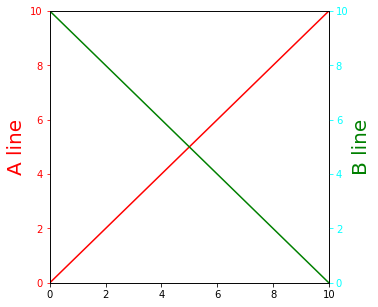

In [12]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

a = np.linspace(0,10,11)
b = np.linspace(10,0,11)

bb = ax.twinx()

ax.plot(a,a, color = "red")
bb.plot(a,b, color = "green")

ax.set_ylabel("A line",color="red", fontsize=20)
ax.tick_params(axis='y', colors="red")
ax.set_ylim((0,10))

bb.spines["right"].set_position(("axes", 1))
bb.set_ylabel("B line",color="green", fontsize=20)
bb.tick_params(axis='y', colors="cyan")
bb.set_ylim((0,10))

plt.xlim((0,10))

plt.show()

In [13]:
len(para_6_sigma)

57252

hist_A [ 593 5581 8977 8295 7558 6828 5721 4972 3625 2807 2223   70    0    1
    0    0    1]
[ 2.33314395  3.90330315  5.47346234  7.04362154  8.61378074 10.18393993
 11.75409913 13.32425833 14.89441752 16.46457672 18.03473592 19.60489511
 21.17505431 22.74521351 24.31537271 25.8855319  27.4556911  29.0258503 ]
[   8.81457    0.58277    0.         2.7323     1.3753     2.14021
    5.14009    0.44884    5.51499    4.75061    7.6731    11.36439
 -347.30806 -347.30806 -347.30806 -347.30806 -347.30806]
hist_B [  83  517 2410 5038 4762 4051 3735 4059 4584 5982 7729 7493 4501 1779
  441   74   14]
[ 2.36322689  3.44368867  4.52415046  5.60461224  6.68507402  7.7655358
  8.84599759  9.92645937 11.00692115 12.08738293 13.16784472 14.2483065
 15.32876828 16.40923006 17.48969185 18.57015363 19.65061541 20.73107719]
[33.75382 12.9676   5.98715  0.08077  1.72887  0.       2.82676  1.88909
  1.3753   5.71264  2.14021  3.15865  5.97316  0.44884 17.51561 41.47623
 60.28577]


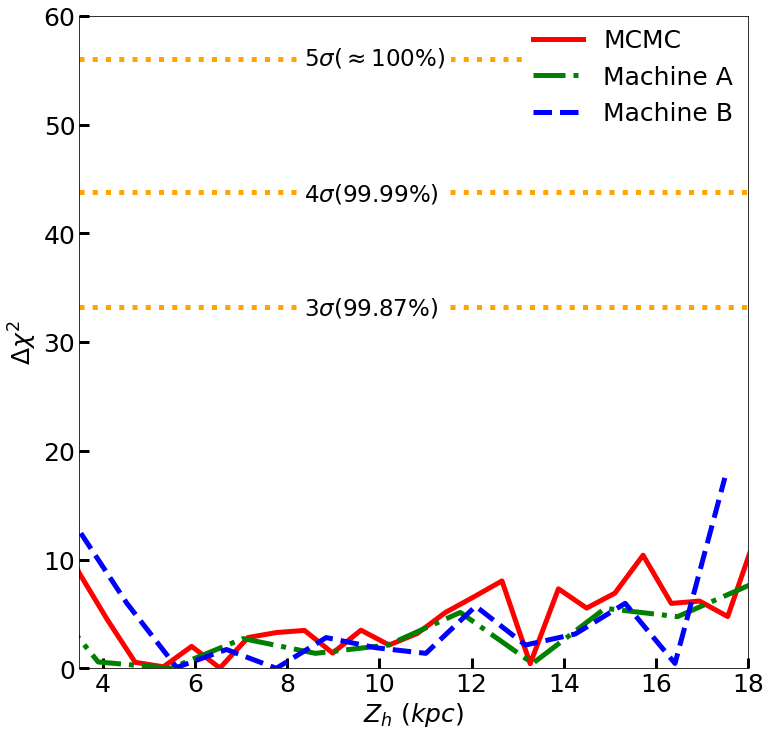

In [18]:
para_name  = [r"$D_0$ ($10^{28}$cm$^{2}$ s$^{-1})$", r"$\delta$", r"$Z_h$ $(kpc)$", r"$v_A$ (km s$^{-1}$)", 
              r"$\eta$", r"$\nu_1$", r"$\nu_2$", r"$\log_{10}(R_{br,1})$", r"$\nu_3$", r"$\log_{10}(R_{br,2})$"]
save_name = ["D0", "delta", "Zh", "vA","eta", "nu1", "nu2", "R1", "nu3", "R2"]


# thin_data = np.linspace(0,8200,1000,dtype="int")
# index_wo_noise = chi_index_wo_noise[thin_data]

para_6_sigma = para_6_sigma
chi_6_tmp = np.argsort(chi_6_sigma)
chi_6 = chi_6_sigma

for i in range(10):
    
    if i != 2:
        continue
        
    min_chi, min_chi_A, min_chi_B = [], [], []
    ##################################################
#     """
#     Total Return (Machine A)
#     """
#     para_tmp = para_4_1[:15000]
#     chi_tmp = np.argsort(chi_4[:15000])
#     chi = chi_4[:15000]
#     if i >= 5 :
#         i = i + 1
        
#     """
#     Total Return (Machine B)
#     """
#     para_tmp = para_4_1[15000:]
#     chi_tmp = np.argsort(chi_4[15000:])
#     chi = chi_4[15000:]
#     if i >= 5 :
#         i = i + 1
    
    """
    Return in Pack (Machine A)
    """
    para_tmp_A = return_recovery_wo_noise
    chi_tmp_A = chi_index_wo_noise
    chi_A = chi_4[:15000][inpack_1][tmp_1]
    
    
    """
    Return in Pack (Machine B)
    """
    para_tmp_B = return_recovery_w_noise
    chi_tmp_B = chi_index_w_noise
    chi_B = chi_4[15000:][inpack_2][tmp_2]
    
    
    chi_tmp_A = chi_index_pseudo
    chi_tmp_B = chi_index_pseudo
    chi_A = chi_pseudo
    chi_B = chi_pseudo
    
    
#     print("####################")
    bin_size_A = np.linspace(min(para_tmp_A[:,i]), max(para_tmp_A[:,i]), 18)
    hist_A, binsize_A = np.histogram(para_tmp_A[:,i], bins=bin_size_A)
    print("hist_A", hist_A)
    print(bin_size_A)

    for j in range(len(bin_size_A)-1):
        if hist_A[j] <= 1:
            min_chi_A.append(0)  
        elif hist_A[j] > 1:
            min_chi_A.append(min(chi_A[chi_tmp_A][np.where((para_tmp_A[:,i][chi_tmp_A] >= bin_size_A[j]) & (para_tmp_A[:,i][chi_tmp_A] <= bin_size_A[j+1]))]))  
    print(np.array(min_chi_A)-min(chi_pseudo))
    
#     print("####################")
    bin_size_B = np.linspace(min(para_tmp_B[:,i]), max(para_tmp_B[:,i]), 18)
    hist_B, binsize_B = np.histogram(para_tmp_B[:,i], bins=bin_size_B)
    print("hist_B",hist_B)
    print(bin_size_B)

    for j in range(len(bin_size_B)-1):
        min_chi_B.append(min(chi_B[chi_tmp_B][np.where((para_tmp_B[:,i][chi_tmp_B] >= bin_size_B[j]) & (para_tmp_B[:,i][chi_tmp_B] <= bin_size_B[j+1]))]))  
    print(np.array(min_chi_B)-min(chi_pseudo))

    k = i
    if i >= 5 :
        k += 1
    bin_size = np.linspace(min(para_6_sigma[:,k]), max(para_6_sigma[:,k]), 30)
    hist, binsize = np.histogram(para_6_sigma[:,k], bins=bin_size)
#     print(hist)
#     print("####################")
    for j in range(len(bin_size)-1):
        min_chi.append(min(chi_6[chi_6_tmp][np.where((para_6_sigma[:,k][chi_6_tmp] >= bin_size[j]) & (para_6_sigma[:,k][chi_6_tmp] <= bin_size[j+1]))]))  
    
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    
    p1, = ax.plot(bin_size[:-1], np.array(min_chi)-min(chi_pseudo), "-", color="red", linewidth=5, alpha=1, label="MCMC")
    p2, = ax.plot(binsize_A[:-1], np.array(min_chi_A)-min(chi_pseudo), "-.", color="green", linewidth=5, alpha=1, label="Machine A")
    p3, = ax.plot(binsize_B[:-3], (np.array(min_chi_B)-min(chi_pseudo))[:-2], "--", color="blue", linewidth=5, alpha=1, label="Machine B")
    
    
    ax.set_ylabel("$\Delta \chi^2$", color="k", fontsize=25)
    ax.tick_params(axis='y', colors="k", length=10, width=3, labelsize=25, direction="in") 
    ax.set_ylim((0,60))
    
    ax.tick_params(axis='x', color="black", length=10, width=3, labelsize=25, direction="in")
    ax.set_xlabel(para_name[i], color="black", fontsize=25)

    if i == 0 or i == 1 or i == 2 or i == 3 or i == 4 or i == 6 or i == 7 or i == 8 or i == 9 :
        ax.axhline(y=56.04 , xmin=0, xmax = 0.9, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[10],y=55.5, s="$5\sigma$($\\approx 100\%$)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[10],y=43, s="4$\sigma$(99.99%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[10],y=32.5, s="3$\sigma$(99.87%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 
    
    
    if i == 5:
        ax.axhline(y=56.04 , xmin=0, xmax = 0.9, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[6],y=55.5, s="6$\sigma$($\\approx 100\%$)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[6],y=43, s="4$\sigma$(99.99%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 

        ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
        ax.text(x=bin_size[6],y=32.5, s="3$\sigma$(99.87%)",fontsize=23, bbox=dict(facecolor='white', alpha=1, edgecolor = "w")) 
    
    lines = [p1, p2, p3]
    ax.legend(lines, [l.get_label() for l in lines], loc="upper right", bbox_to_anchor=(1.011, 1.015), ncol=1, fontsize=25, edgecolor = "w",fancybox=False, framealpha=1)
    
#     plt.xlim(bin_size[2])
    
    
    if i == 2:
        plt.xlim(bin_size[2],18)
        
    if i == 6:
        plt.xlim(bin_size[2],2.448)
    
#     if i >= 5 :
#         i -= 1
    plt.savefig("./Figures/"+save_name[i]+"_2.pdf")
    plt.show()
    ##################################################

In [ ]:
"""
para_name  = [r"$D_0$ ($10^{28}$cm$^{2}$ s$^{-1})$", r"$\delta$", r"$Z_h$ $(kpc)$", r"$v_A$ (km s$^{-1}$)", 
              r"$\eta$", r"$\nu_1$", r"$\nu_2$", r"$\log_{10}(R_{br,1})$", r"$\nu_3$", r"$\log_{10}(R_{br,2})$"]
save_name = ["D0", "delta", "Zh", "vA","eta", "nu1", "nu2", "R1", "nu3", "R2"]


# thin_data = np.linspace(0,8200,1000,dtype="int")
# index_wo_noise = chi_index_wo_noise[thin_data]

para_6_sigma = para_6_sigma
chi_6_tmp = np.argsort(chi_6_sigma)
chi_6 = chi_6_sigma

for i in range(10):
    
    min_chi, min_chi_A, min_chi_B = [], [], []
    ##################################################

#     #Total Return (Machine A)
#     para_tmp = para_4_1[:15000]
#     chi_tmp = np.argsort(chi_4[:15000])
#     chi = chi_4[:15000]
#     if i >= 5 :
#         i = i + 1
        
#     #Total Return (Machine B)
#     para_tmp = para_4_1[15000:]
#     chi_tmp = np.argsort(chi_4[15000:])
#     chi = chi_4[15000:]
#     if i >= 5 :
#         i = i + 1
    
    #Return in Pack (Machine A)
    para_tmp = return_recovery_wo_noise
    chi_tmp = chi_index_wo_noise
    chi = chi_4[:15000][inpack_1][tmp_1]
    
    
    #Return in Pack (Machine B)
    para_tmp_B = return_recovery_w_noise
    chi_tmp_B = chi_index_w_noise
    chi_B = chi_4[15000:][inpack_2][tmp_2]
    
#     print("####################")
    bin_size_A = np.linspace(min(para_tmp[:,i]), max(para_tmp[:,i]), 18)
    hist_A, binsize_A = np.histogram(para_tmp[:,i], bins=bin_size_A)
#     print(hist_A)

    for j in range(len(bin_size_A)-1):
        min_chi_A.append(min(chi[chi_tmp][np.where((para_tmp[:,i][chi_tmp] >= bin_size_A[j]) & (para_tmp[:,i][chi_tmp] <= bin_size_A[j+1]))]))  
    
#     print("####################")
    bin_size_B = np.linspace(min(para_tmp_B[:,i]), max(para_tmp_B[:,i]), 18)
    hist_B, binsize_B = np.histogram(para_tmp_B[:,i], bins=bin_size_B)
#     print(hist_B)

    for j in range(len(bin_size_B)-1):
        min_chi_B.append(min(chi_B[chi_tmp_B][np.where((para_tmp_B[:,i][chi_tmp_B] >= bin_size_B[j]) & (para_tmp_B[:,i][chi_tmp_B] <= bin_size_B[j+1]))]))  
    

    k = i
    if i >= 5 :
        k += 1
    bin_size = np.linspace(min(para_6_sigma[:,k]), max(para_6_sigma[:,k]), 30)
    hist, binsize = np.histogram(para_6_sigma[:,k], bins=bin_size)
#     print(hist)
#     print("####################")
    for j in range(len(bin_size)-1):
        min_chi.append(min(chi_6[chi_6_tmp][np.where((para_6_sigma[:,k][chi_6_tmp] >= bin_size[j]) & (para_6_sigma[:,k][chi_6_tmp] <= bin_size[j+1]))]))  
    
    
    fig, ax = plt.subplots(1,1, figsize=(12,12))
    
    p1, = ax.plot(bin_size[:-1], np.array(min_chi)-min(chi_6), "-", color="red", linewidth=5, alpha=1, label="MCMC")
    p2, = ax.plot(binsize_A[:-1], np.array(min_chi_A)-min(chi_6), "-.", color="green", linewidth=5, alpha=1, label="Machine A")
    p3, = ax.plot(binsize_B[:-1], np.array(min_chi_B)-min(chi_6), "--", color="blue", linewidth=5, alpha=1, label="Machine B")
    
    ax.set_ylabel("$\Delta \chi^2$", color="k", fontsize=25)
    ax.tick_params(axis='y', colors="k", length=10, width=3, labelsize=25, direction="in") 
    ax.set_ylim((0,80))
    
    ax.tick_params(axis='x', color="black", length=10, width=3, labelsize=25, direction="in")
    ax.set_xlabel(para_name[i], color="black", fontsize=25)


    ax.axhline(y=69.91 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
    ax.text(x=bin_size[3],y=69.91, s="6$\sigma$(99.87%)",fontsize=23) 

    ax.axhline(y=43.82 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
    ax.text(x=bin_size[3],y=45, s="4$\sigma$(99.87%)",fontsize=23) 

    ax.axhline(y=33.20 , xmin=0, xmax = 1, linewidth = 5, linestyle = ":", color = "Orange")
    ax.text(x=bin_size[3],y=35, s="3$\sigma$(99.87%)",fontsize=23) 
    
#     bin_size = np.linspace(min(para_tmp[:,i]), max(para_tmp[:,i]), 70)
#     hist, binsize = np.histogram(para_tmp[:,i], bins=bin_size)

#     rightplot = ax.twinx()
#     p4, = rightplot.step(binsize[:-1], hist.astype(np.float32)/hist.sum(), color = "darkblue", where='mid',linewidth=5, alpha=0.7, label="Our Method")
#     rightplot.spines["right"].set_position(("axes", 1))
#     rightplot.set_ylabel("Distribution", color="darkblue", fontsize=25)
#     rightplot.tick_params(axis='y', colors="darkblue", length=10, width=3, labelsize=25, direction="in") 
#     rightplot.yaxis.label.set_color("darkblue")
#     rightplot.set_ylim((0,np.max(hist.astype(np.float32)/hist.sum())*1.2))
    

    lines = [p1, p2, p3]
    ax.legend(lines, [l.get_label() for l in lines],loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)

#     if i >= 5 :
#         i -= 1
#     plt.savefig("./Figures/Machine_B_"+save_name[i]+".pdf")
    plt.show()
    ##################################################
"""